# Classification

In [1]:
! pip install pydotplus
! pip install graphviz

#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus, graphviz



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


# 1. Visegrad Group Companies Dataset

We use Visegrad Group Companies dataset for our clustering. </br>
It consists of 82 continuous features financial and operational metrics (X1-X82) capturing profitability, liquidity, efficiency, leverage, cash flow, market performance, and growth ratios, categorized by industry sectors such as transportation, wholesale, manufacturing, retail, energy, and construction.</br>

We first import the dataset as follows.

https://archive.ics.uci.edu/dataset/830/visegrad+group+companies+data-2


X1: Net profit/total assets <br/>
X2: Total liabilities/total assets <br/>
X3: Working capital/total assets <br/>
X4: Current assets/short-term liabilities <br/>
X5: Retained earnings/total assets <br/>
X6: Gross profit/total assets <br/>
X7: Book value of equity/total liabilities <br/>
X8: Net sales revenue/total assets <br/>
X9: Equity/total assets <br/>
X10: (Gross profit + financial expenses)/total assets <br/>
X11: Gross profit/short-term liabilities <br/>
X12: (Gross profit + depreciation)/sales revenues <br/>
X13: EBIT/total operating costs <br/>
X14: (Gross profit + depreciation)/total liabilities <br/>
X15: Total assets/total liabilities <br/>
X16: EBIT/total liabilities <br/>
X17: Gross profit/sales revenues <br/>
X18: EBIT/total assets <br/>
X19: Net profit/sales revenues <br/>
X20: (Equity-share capital)/total assets <br/>
X21: (Net profit + depreciation)/total liabilities <br/>
X22: EBIT/financial expenses <br/>
X23: Working capital/fixed assets <br/>
X24: Logarithm of total assets <br/>
X25: (Total liabilities-cash)/sales revenues <br/>
X26: EBIT/equity <br/>
X27: Operating expenses/short-term liabilities <br/>
X28: Operating expenses/total liabilities <br/>
X29: Profit on sales/total assets <br/>
X30: Total operating revenue/total assets <br/>
X31: (Current assets-inventories)/long-term liabilities <br/>
X32: Constant capital/total assets <br/>
X33: Profit on sales/sales revenues <br/>
X34: (Current assets-inventory-receivables)/short-term liabilities <br/>
X35: EBIT/sales revenues <br/>
X36: Net profit/inventory <br/>
X37: (Current assets-inventory)/short-term liabilities <br/>
X38: EBITDA/total assets <br/>
X39: EBITDA/sales revenues <br/>
X40: Current assets/total liabilities <br/>
X41: Short-term liabilities/total assets <br/>
X42: Equity/fixed assets <br/>
X43: Constant capital/fixed assets <br/>
X44: Working capital <br/>
X45: Net profit/equity <br/>
X46: Long-term liabilities/equity <br/>
X47: Sales revenues/inventory <br/>
X48: Sales revenues/receivables <br/>
X49: Sales revenues/short-term liabilities <br/>
X50: Sales/fixed assets <br/>
X51: (Current assets-inventory-short-term liabilities)/(total operating revenues-profit before income tax-depreciation) <br/>
X52: Net profit/net cash flow from (used in) operating activities <br/>
X53: Depreciation/net cash flow from (used in) operating activities <br/>
X54: Net cash flow from (used in) operating activities/total assets <br/>
X55: Net cash flow from (used in) operating activities/income <br/>
X56: Net cash flow from (used in) operating activities/total liabilities <br/>
X57: Net cash flow from (used in) operating activities/long-term liabilities <br/>
X58: Net cash flow from (used in) operating activities/short-term liabilities <br/>
X59: Net cash flow <br/>
X60: Net cash flow from (used in) operating activities/current assets <br/>
X61: Net cash flow from (used in) operating activities/EBIT <br/>
X62: Net profit per share <br/>
X63: Income/outstanding shares <br/>
X64: Price per share/net profit per share <br/>
X65: Yearly dividend/price per share <br/>
X66: Market capitalization/book value <br/>
X67: Market capitalization/gross profit <br/>
X68: Market capitalization/EBITDA <br/>
X69: Market capitalization to EBIT <br/>
X70: Market capitalization to total assets <br/>
X71: Market capitalization/capital employed <br/>
X72: Sales revenues (n)/sales revenues (n−1) <br/>
X73: Total sales revenue (n)/total sales revenues (n−1) <br/>
X74: Total assets (n)/total assets (n−1) <br/>
X75: Current assets (n)/current assets (n−1) <br/>
X76: EBIT (n)/EBIT (n−1) <br/>
X77: Net profit (n)/net profit (n−1) <br/>
X78: Inventory (n)/inventory (n−1) <br/>
X79: Receivables (n)/receivables (n−1) <br/>
X80: Short-term liabilities (n)/short-term liabilities (n−1) <br/>
X81: Net cash flow from (used in) operating activities (n)/Net cash flow from (used in) operating activities (n−1) <br/>
X82: Net cash flow(n)/net cash flow (n−1) <br/>

<br/>
Class Labels <br/>
(S): 1. Transportation and warehousing; 2. Wholesale trade; <br/>
3. Manufacturing; 4. Retail trade; 5. Energy; 6. Construction.


### Import dataset

In [2]:
#importing dataset
data = pd.read_csv('csv_result-2019.csv', header="infer")

#make a copy of the data
df = data.copy()

# Display the DataFrame
df

,id,Num,Country,X1,X2,X3,X4,X5,X6,X7,...,X74,X75,X76,X77,X78,X79,X80,X81,X82,S
0,1,10,Hungary,m,m,m,m,m,m,m,...,0,0,0,m,0,0,0,m,m,1
1,2,22,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,27,Hungary,-0.04,0.83,-0.08,0.83,0,-0.03,0.21,...,0.82,0.92,1.16,110.93,0.85,0.96,0.91,m,m,1
3,4,73,Poland,0.01,0.73,0.04,1.06,0.1,0.01,0.37,...,0.87,0.82,-0.1,1.09,0.62,0.97,0.78,-1.03,1.34,1
4,5,74,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,446,404,Slovakia,0.05,0.09,0.03,1.52,0,0.06,10.47,...,0.94,0.88,0.85,m,m,1.04,0.79,m,m,6
446,447,423,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
447,448,427,Slovakia,-0.04,0.06,0.02,1.79,-0.78,-0.05,15.85,...,0.92,0.38,-2.07,m,m,0.63,0.56,m,m,6
448,449,432,Poland,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


# 2. Data Preprocessing

In [3]:
# dataset info
print('Number of instances = %d' % df.shape[0])
print('Number of attributes = %d' % df.shape[1])
print(df.dtypes)

Number of instances = 450
Number of attributes = 86
id          int64
Num         int64
Country    object
X1         object
X2         object
            ...  
X79        object
X80        object
X81        object
X82        object
S           int64
Length: 86, dtype: object


Our classification only looks at statistcal data of performance </br>
The country, industry and number are irrelevant to performance

In [4]:
# Loop through the columns X1 to X85 and convert to float
for col in [f'X{i}' for i in range(1, 83)]:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Converts to float, setting non-numeric to NaN

# drop categorical irrevevant data
df= df.drop(['S', 'Country', 'Num'], axis=1)



In [5]:
#check data types
print(df.dtypes)

id       int64
X1     float64
X2     float64
X3     float64
X4     float64
        ...   
X78    float64
X79    float64
X80    float64
X81    float64
X82    float64
Length: 83, dtype: object


### 2.1 Discretization of Target Feature (X19:Net profit/sales revenues) </br>
Since the data provided lacks categorical features to perform classification, we perform discretization based on IQR to make 3 categories to indicate a company's profitability using X19. X19 a measure of how efficiently a company converts its revenue into profit.

Make categories based on IQR </br>
'Low/Negative Profits': <= 25th percentile </br>
'Average Profits': <= 75th percentile && >25th percentile </br>
'Outperforming Profits': >75th percentile </br>

Net Profit Margin = Net profit/sales revenues </br>
A high net profit margin suggests strong cost control and effective pricing strategies.</br>
A low net profit margin might indicate issues such as high operating costs, low pricing power, or inefficiencies in the business model.

In [6]:
print(df['X19'].describe())
print(df['X19'].min())
print(df['X19'].max())


count     417.000000
mean       -5.479592
std       102.612414
min     -2092.350000
25%         0.000000
50%         0.020000
75%         0.060000
max         7.890000
Name: X19, dtype: float64
-2092.35
7.89


In [7]:
# Define thresholds based on the summary
low_threshold = 0.00  # 25th percentile
high_threshold = 0.06  # 75th percentile

# Categorize data
def categorize_profits(profit):
    if profit <= low_threshold:
        return 'Low/Negative Profits'
    elif low_threshold < profit <= high_threshold:
        return 'Average Profits'
    else:
        return 'Outperforming Profits'

df['Profit_Category'] = df['X19'].apply(categorize_profits)

# View categorized data
print(df)

      id    X1    X2    X3     X4    X5    X6     X7    X8    X9  ...   X74  \
0      1   NaN   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN  ...  0.00   
1      2  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  ...  0.00   
2      3 -0.04  0.83 -0.08   0.83  0.00 -0.03   0.21  1.14  0.17  ...  0.82   
3      4  0.01  0.73  0.04   1.06  0.10  0.01   0.37  1.78  0.27  ...  0.87   
4      5  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  ...  0.00   
..   ...   ...   ...   ...    ...   ...   ...    ...   ...   ...  ...   ...   
445  446  0.05  0.09  0.03   1.52  0.00  0.06  10.47  0.21  0.91  ...  0.94   
446  447  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  ...  0.00   
447  448 -0.04  0.06  0.02   1.79 -0.78 -0.05  15.85  0.08  0.94  ...  0.92   
448  449  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  ...  0.00   
449  450 -0.10  0.10  0.61  11.41  0.27 -0.10   9.05  0.00  0.90  ...  0.93   

      X75   X76     X77   X78   X79   X80   X81   X

In [8]:
print(df['Profit_Category'].value_counts())

Profit_Category
Low/Negative Profits     167
Average Profits          152
Outperforming Profits    131
Name: count, dtype: int64


### 2.2 Domain Level Dimension Reduction

Since I'm using X19 in the categorial form of Profit_Category to determine profitability</br> 
I remove features that use that are calculated using net profits as they are highly correlated to X19

In [9]:
df= df.drop(['X1', 'X21', 'X36', 'X45', 'X52', 'X62', 'X77'], axis=1)

### 2.3 Missing Values


In [10]:
print('Number of instances = %d' % df.shape[0])
print('Number of attributes = %d' % df.shape[1])

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col, df[col].isna().sum()))

Number of instances = 450
Number of attributes = 77
Number of missing values:
	id: 0
	X2: 18
	X3: 19
	X4: 21
	X5: 18
	X6: 18
	X7: 20
	X8: 18
	X9: 18
	X10: 18
	X11: 20
	X12: 38
	X13: 19
	X14: 25
	X15: 20
	X16: 20
	X17: 33
	X18: 18
	X19: 33
	X20: 18
	X22: 33
	X23: 25
	X24: 18
	X25: 33
	X26: 18
	X27: 20
	X28: 20
	X29: 18
	X30: 18
	X31: 51
	X32: 18
	X33: 33
	X34: 21
	X35: 33
	X37: 21
	X38: 26
	X39: 41
	X40: 21
	X41: 18
	X42: 24
	X43: 24
	X44: 1
	X46: 18
	X47: 55
	X48: 20
	X49: 20
	X50: 24
	X51: 23
	X53: 68
	X54: 23
	X55: 38
	X56: 25
	X57: 55
	X58: 25
	X59: 67
	X60: 24
	X61: 34
	X63: 23
	X64: 23
	X65: 36
	X66: 23
	X67: 25
	X68: 66
	X69: 33
	X70: 23
	X71: 29
	X72: 45
	X73: 35
	X74: 35
	X75: 38
	X76: 48
	X78: 74
	X79: 39
	X80: 36
	X81: 84
	X82: 84
	Profit_Category: 0


In [11]:
print(df.head)

<bound method NDFrame.head of       id    X2    X3     X4    X5    X6     X7    X8    X9   X10  ...   X73  \
0      1   NaN   NaN    NaN   NaN   NaN    NaN   NaN   NaN   NaN  ...  0.00   
1      2  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  0.00  ...  0.00   
2      3  0.83 -0.08   0.83  0.00 -0.03   0.21  1.14  0.17 -0.03  ...  0.92   
3      4  0.73  0.04   1.06  0.10  0.01   0.37  1.78  0.27  0.02  ...  1.02   
4      5  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  0.00  ...  0.00   
..   ...   ...   ...    ...   ...   ...    ...   ...   ...   ...  ...   ...   
445  446  0.09  0.03   1.52  0.00  0.06  10.47  0.21  0.91  0.06  ...  0.97   
446  447  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  0.00  ...  0.00   
447  448  0.06  0.02   1.79 -0.78 -0.05  15.85  0.08  0.94 -0.05  ...  0.53   
448  449  0.00  0.00   0.00  0.00  0.00   0.00  0.00  0.00  0.00  ...  0.00   
449  450  0.10  0.61  11.41  0.27 -0.10   9.05  0.00  0.90 -0.10  ...  0.95   

      X74   X75   X76

In [12]:
df_cleaned = df.dropna()

In [13]:
print('Number of instances = %d' % df_cleaned.shape[0])
print('Number of attributes = %d' % df_cleaned.shape[1])

print('Number of missing values:')
for col in df_cleaned.columns:
    print('\t%s: %d' % (col, df_cleaned[col].isna().sum()))

Number of instances = 238
Number of attributes = 77
Number of missing values:
	id: 0
	X2: 0
	X3: 0
	X4: 0
	X5: 0
	X6: 0
	X7: 0
	X8: 0
	X9: 0
	X10: 0
	X11: 0
	X12: 0
	X13: 0
	X14: 0
	X15: 0
	X16: 0
	X17: 0
	X18: 0
	X19: 0
	X20: 0
	X22: 0
	X23: 0
	X24: 0
	X25: 0
	X26: 0
	X27: 0
	X28: 0
	X29: 0
	X30: 0
	X31: 0
	X32: 0
	X33: 0
	X34: 0
	X35: 0
	X37: 0
	X38: 0
	X39: 0
	X40: 0
	X41: 0
	X42: 0
	X43: 0
	X44: 0
	X46: 0
	X47: 0
	X48: 0
	X49: 0
	X50: 0
	X51: 0
	X53: 0
	X54: 0
	X55: 0
	X56: 0
	X57: 0
	X58: 0
	X59: 0
	X60: 0
	X61: 0
	X63: 0
	X64: 0
	X65: 0
	X66: 0
	X67: 0
	X68: 0
	X69: 0
	X70: 0
	X71: 0
	X72: 0
	X73: 0
	X74: 0
	X75: 0
	X76: 0
	X78: 0
	X79: 0
	X80: 0
	X81: 0
	X82: 0
	Profit_Category: 0


In [14]:
print(df_cleaned.head)

<bound method NDFrame.head of       id    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...    X73  \
1      2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   
3      4  0.73  0.04  1.06  0.10  0.01  0.37  1.78  0.27  0.02  ...   1.02   
4      5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   
5      6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   
8      9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.38  0.02  ...   1.06   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
440  441  0.38  0.50  2.34 -0.06 -0.02  1.64  0.18  0.62 -0.02  ...   0.79   
441  442  1.65 -0.51  0.28 -1.40 -0.50 -0.39  1.16 -0.65 -0.43  ...  28.03   
442  443  0.83 -0.42  0.39 -0.29 -0.29  0.20  0.55  0.17 -0.28  ...   1.41   
446  447  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   
448  449  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   0.00   

      X74   X75    X76   X78   X7

In [15]:
print(df_cleaned['Profit_Category'].value_counts())

Profit_Category
Average Profits          101
Low/Negative Profits      83
Outperforming Profits     54
Name: count, dtype: int64


### 2.4 Outliers

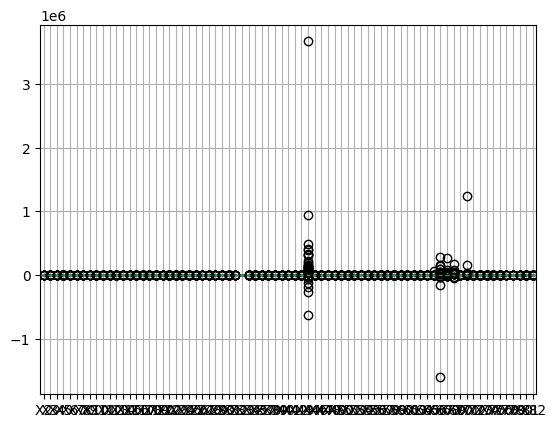

In [16]:
#drop id and target attribute
data2 = df_cleaned.drop(['id', "Profit_Category"], axis=1)
data2

#show boxplot to detect outliers
data2.boxplot()
plt.show()

this shows that some attributes has abnomally high and low values </br>
However the majority are nearer the 0 line.

#### 2.4.1 Z-Normalisation

In [17]:
z = (data2-data2.mean())/data2.std()
z

,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,...,X72,X73,X74,X75,X76,X78,X79,X80,X81,X82
1,-1.411537,-0.275898,-1.265819,0.142108,-0.151795,-0.697126,-0.750801,-1.014621,-0.170706,-0.381634,...,-0.451337,-0.508915,-2.057132,-1.888035,-0.091534,-1.477692,-0.151088,-1.506892,-0.165211,-0.082386
3,0.577759,-0.150765,-0.312904,0.316266,-0.124026,-0.438287,0.319671,-0.240739,-0.115617,-0.344832,...,0.034019,-0.010431,-0.062051,-0.120713,-0.100286,-0.458537,-0.056891,-0.283346,-0.330059,-0.051111
4,-1.411537,-0.275898,-1.265819,0.142108,-0.151795,-0.697126,-0.750801,-1.014621,-0.170706,-0.381634,...,-0.451337,-0.508915,-2.057132,-1.888035,-0.091534,-1.477692,-0.151088,-1.506892,-0.165211,-0.082386
5,-1.411537,-0.275898,-1.265819,0.142108,-0.151795,-0.697126,-0.750801,-1.014621,-0.170706,-0.381634,...,-0.451337,-0.508915,-2.057132,-1.888035,-0.091534,-1.477692,-0.151088,-1.506892,-0.165211,-0.082386
8,0.278002,-0.244615,-0.348863,0.124692,-0.124026,-0.270391,0.247504,0.074546,-0.115617,-0.344832,...,-0.004638,0.009117,0.580044,0.547421,-0.062654,0.034603,-0.053007,0.595098,0.113270,-0.041542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,-0.376013,1.288268,0.837785,0.037612,-0.207333,0.450162,-0.642551,0.762441,-0.225795,-0.492042,...,-0.185036,-0.122835,0.029677,0.267235,-0.164172,0.346924,-0.087966,-0.157854,-0.314054,-0.044810
441,3.084817,-1.871347,-1.014105,-2.296115,-1.540239,-0.969957,-0.053190,-2.877671,-1.355118,-1.688129,...,14.178058,13.189618,-1.139854,-1.370770,3.850145,-1.477692,-0.065631,-0.816686,-0.147606,-0.096156
442,0.850265,-1.589798,-0.915218,-0.362953,-0.957092,-0.557213,-0.420037,-0.527362,-0.941951,-1.154491,...,-0.103427,0.180166,0.924023,-0.659531,-0.359330,-0.179091,-0.112244,3.936321,-0.715771,-0.072117
446,-1.411537,-0.275898,-1.265819,0.142108,-0.151795,-0.697126,-0.750801,-1.014621,-0.170706,-0.381634,...,-0.451337,-0.508915,-2.057132,-1.888035,-0.091534,-1.477692,-0.151088,-1.506892,-0.165211,-0.082386


In [18]:
# Assuming df_cleaned is your DataFrame
for i in range(1, 83):  # Looping from X1 to X85
    column_name = f"X{i}"
    z_column_name = f"z_score_{column_name}"
    
    if column_name in data2.columns:  # Check if the column exists
        # Compute z-score and safely assign to a new column
        df_cleaned.loc[:, z_column_name] = (data2[column_name] - data2[column_name].mean()) / data2[column_name].std()
    else:
        print(f"Column {column_name} not found in the DataFrame.")

# Check the resulting DataFrame
print(df_cleaned.head())

Column X1 not found in the DataFrame.
Column X21 not found in the DataFrame.
Column X36 not found in the DataFrame.
Column X45 not found in the DataFrame.
Column X52 not found in the DataFrame.
Column X62 not found in the DataFrame.
Column X77 not found in the DataFrame.
   id    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...  z_score_X72  \
1   2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...    -0.451337   
3   4  0.73  0.04  1.06  0.10  0.01  0.37  1.78  0.27  0.02  ...     0.034019   
4   5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...    -0.451337   
5   6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...    -0.451337   
8   9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.38  0.02  ...    -0.004638   

   z_score_X73  z_score_X74  z_score_X75  z_score_X76  z_score_X78  \
1    -0.508915    -2.057132    -1.888035    -0.091534    -1.477692   
3    -0.010431    -0.062051    -0.120713    -0.100286    -0.458537   
4    -0.508915    -2.057132    

/tmp/ipykernel_7172/176627193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, z_column_name] = (data2[column_name] - data2[column_name].mean()) / data2[column_name].std()
/tmp/ipykernel_7172/176627193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, z_column_name] = (data2[column_name] - data2[column_name].mean()) / data2[column_name].std()
/tmp/ipykernel_7172/176627193.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [19]:
# Step 2: Filter rows where z-scores are between -3 and 3
for i in range(1, 83):  # Loop through X1 to X85 again for filtering
    z_column_name = f"z_score_X{i}"  # Construct z-score column name
    
    if z_column_name in df_cleaned.columns:  # Ensure the z-score column exists
        # Filter rows where the z-score is between -3 and 3
        df_cleaned = df_cleaned[df_cleaned[z_column_name].between(-3, 3)]
    else:
        print(f"Column {z_column_name} not found in the DataFrame.")

# Check the resulting DataFrame
print(df_cleaned)

Column z_score_X1 not found in the DataFrame.
Column z_score_X21 not found in the DataFrame.
Column z_score_X36 not found in the DataFrame.
Column z_score_X45 not found in the DataFrame.
Column z_score_X52 not found in the DataFrame.
Column z_score_X62 not found in the DataFrame.
Column z_score_X77 not found in the DataFrame.
      id    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...  \
1      2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   
4      5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   
5      6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...   
8      9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.38  0.02  ...   
21    22  0.61  0.04  1.17  0.25  0.07  0.64  0.70  0.39  0.05  ...   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
438  439  0.43 -0.11  0.72 -0.29 -0.29  1.24  1.17  0.54 -0.26  ...   
439  440  1.18 -0.67  0.43 -0.66  0.06 -0.15  0.47 -0.18  0.14  ...   
440  441  0.38  0.50  2.34 -0.06 

In [20]:
# Loop through and drop z-score columns (z_score_X1 to z_score_X85)
for i in range(1, 83):  # Loop through X1 to X85
    z_column_name = f"z_score_X{i}"  # Construct z-score column name
    
    if z_column_name in df_cleaned.columns:  # Check if the column exists
        df_cleaned = df_cleaned.drop(columns=[z_column_name])  # Drop the column
    else:
        print(f"Column {z_column_name} not found in the DataFrame.")

# Check the resulting DataFrame
print(df_cleaned)

Column z_score_X1 not found in the DataFrame.
Column z_score_X21 not found in the DataFrame.
Column z_score_X36 not found in the DataFrame.
Column z_score_X45 not found in the DataFrame.
Column z_score_X52 not found in the DataFrame.
Column z_score_X62 not found in the DataFrame.
Column z_score_X77 not found in the DataFrame.
      id    X2    X3    X4    X5    X6    X7    X8    X9   X10  ...   X73  \
1      2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
4      5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
5      6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.00   
8      9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.38  0.02  ...  1.06   
21    22  0.61  0.04  1.17  0.25  0.07  0.64  0.70  0.39  0.05  ...  0.94   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
438  439  0.43 -0.11  0.72 -0.29 -0.29  1.24  1.17  0.54 -0.26  ...  0.80   
439  440  1.18 -0.67  0.43 -0.66  0.06 -0.15  0.47 -0.18

### 2.5 Duplicated Data

In [21]:
#check any duplicated data
dups = df_cleaned.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### 2.6 Further Dimension Reduction

Currently, we have 74 attributes (excluding X19) to determine Profit_Category. </br>
To further simplify computation we conduct dimension reduction via correlation.</br>

The correlation matrix quantifies the linear relationship between all pairs of features in the dataset.</br>
Each value in the matrix represents the Pearson correlation coefficient between two features. </br>
High correlation indicates redundancy, as the features convey similar information. </br>
Example: If two features have a correlation of 0.90, they are almost linearly dependent. </br>

In [22]:
correlation_matrix = data2.corr()
correlation_with_X19 = correlation_matrix['X19'].sort_values(ascending=False)

# Display the correlation with X19
correlation_with_X19[0:30]


X19    1.000000
X12    0.768345
X17    0.763524
X35    0.659142
X39    0.595097
X11    0.528221
X14    0.450600
X6     0.396062
X10    0.387863
X16    0.380663
X18    0.279034
X47    0.277980
X5     0.276706
X38    0.276140
X3     0.243857
X32    0.230542
X34    0.227611
X9     0.225788
X4     0.213998
X37    0.198525
X7     0.173989
X15    0.167976
X69    0.154628
X65    0.145253
X40    0.129609
X75    0.111022
X70    0.100254
X24    0.098141
X66    0.096744
X81    0.095478
Name: X19, dtype: float64

Removing one feature from each correlated pair simplifies the dataset while retaining most of the information. </br>
Highly correlated features can cause: </br>
1. Multicollinearity in models, which destabilizes regression coefficients. </br>
2. Redundant calculations, leading to inefficiency in machine learning algorithms. </br>
3. Overfitting, as redundant features can artificially inflate the importance of related variables.</br>


However, Aggregating (e.g., averaging correlated features) is an alternative for future exploration. </br>
However, dropping features is simpler and often effective if the features are closely correlated

In [23]:
# Step 1: Compute the correlation matrix
corr_matrix = data2.corr()

# Step 2: Identify highly correlated features (e.g., correlation > 0.9)
threshold = 0.9
high_corr_pairs = set()

# Loop over the bottom triangle of the correlation matrix (excluding the diagonal)
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_pairs.add(colname)

# Step 3: Drop one feature from each highly correlated pair
# Optionally, you can aggregate features instead of removing them. 
# Here, we drop the highly correlated features.
df_reduced = df_cleaned.drop(columns=high_corr_pairs)

# Step 4: Output the results
print("Highly correlated features to drop:", high_corr_pairs)
print("Reduced DataFrame:")
print(df_reduced)

Highly correlated features to drop: {'X17', 'X14', 'X35', 'X50', 'X60', 'X43', 'X64', 'X49', 'X42', 'X10', 'X38', 'X73', 'X32', 'X75', 'X71', 'X41', 'X15', 'X30', 'X39'}
Reduced DataFrame:
      id    X2    X3    X4    X5    X6    X7    X8    X9   X11  ...      X70  \
1      2  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...     0.00   
4      5  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...     0.00   
5      6  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...     0.00   
8      9  0.62  0.01  1.02 -0.01  0.01  0.61  1.66  0.38  0.02  ...   338.29   
21    22  0.61  0.04  1.17  0.25  0.07  0.64  0.70  0.39  0.32  ...   414.04   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...      ...   
438  439  0.43 -0.11  0.72 -0.29 -0.29  1.24  1.17  0.54 -0.75  ...  1238.26   
439  440  1.18 -0.67  0.43 -0.66  0.06 -0.15  0.47 -0.18  0.05  ...    66.30   
440  441  0.38  0.50  2.34 -0.06 -0.02  1.64  0.18  0.62 -0.06  ...   276.69   
446  447  0

In [24]:
df_reduced = df_reduced.drop("X19", axis=1)

So after preprocessing we now only have 55 attributes for classification

In [25]:
print(df_reduced.columns)

print("Number of columns:", len(df_reduced.columns))

Index(['id', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X11', 'X12',
       'X13', 'X16', 'X18', 'X20', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27',
       'X28', 'X29', 'X31', 'X33', 'X34', 'X37', 'X40', 'X44', 'X46', 'X47',
       'X48', 'X51', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X61',
       'X63', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X72', 'X74', 'X76',
       'X78', 'X79', 'X80', 'X81', 'X82', 'Profit_Category'],
      dtype='object')
Number of columns: 57


# 3. Classification

### Decision Tree Classifier

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_reduced.drop(['Profit_Category','id'],axis=1),df_reduced['Profit_Category'],test_size=0.30,random_state=69)

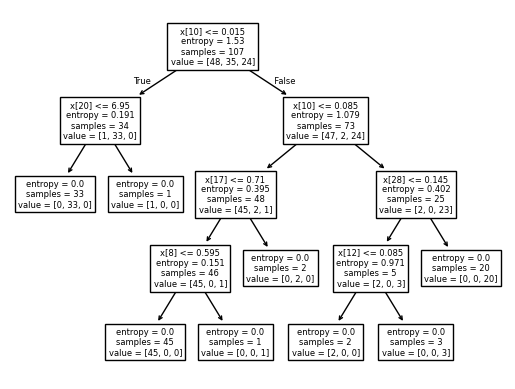

In [27]:
from sklearn import tree

dtree= tree.DecisionTreeClassifier(criterion='entropy', random_state=69)
dtree.fit(x_train, y_train)
pred_labels_dtree = dtree.predict(x_test)

tree.plot_tree(dtree)
plt.show()

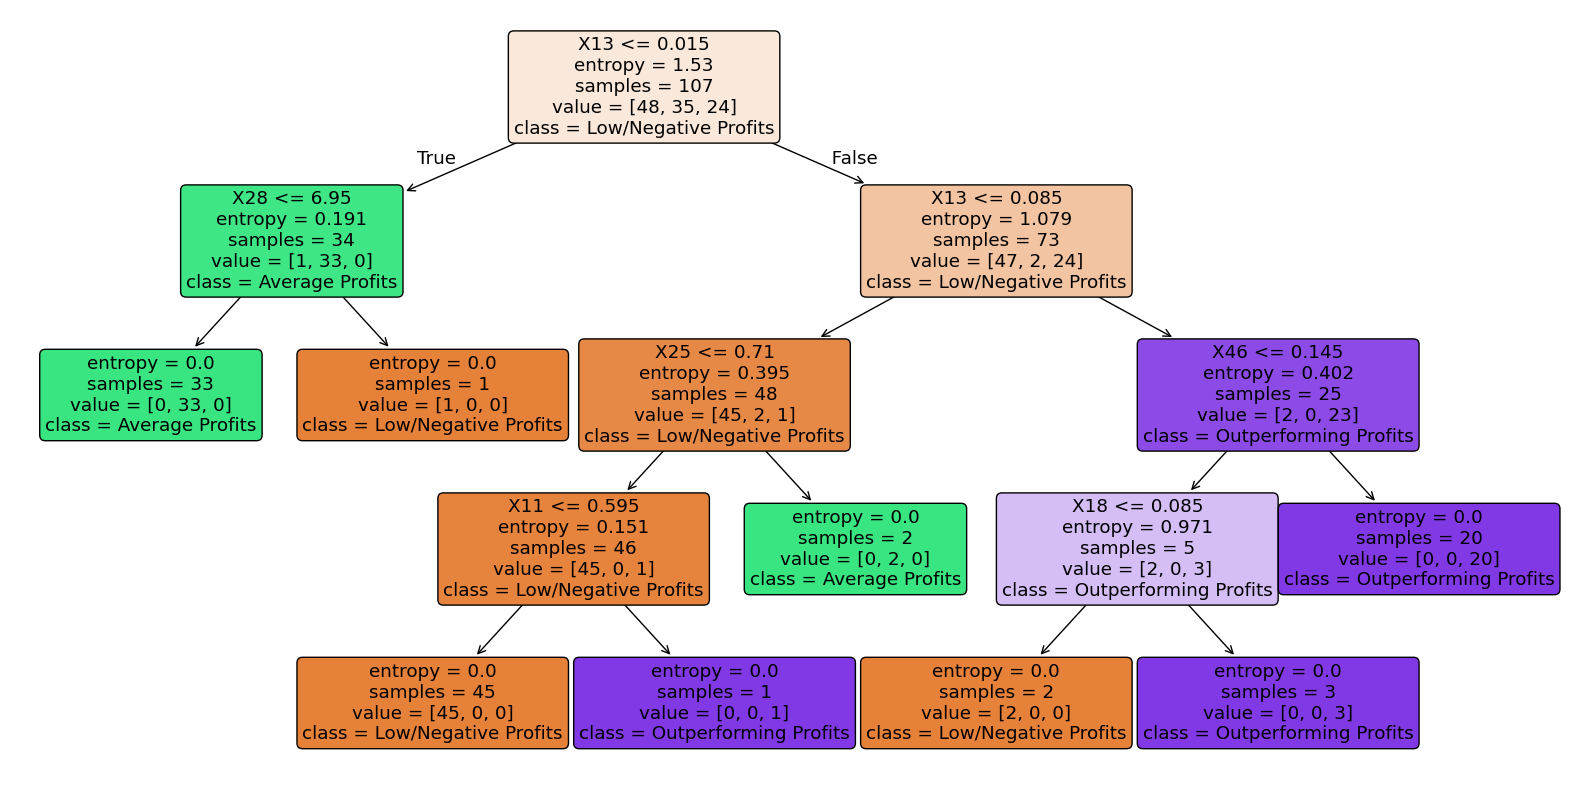

In [28]:
# Import required libraries
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Prepare the data features
data_feat = df_reduced.drop(['Profit_Category', 'id'], axis=1)  # Corrected syntax
features = list(data_feat.columns)

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the size of the plot as needed
plot_tree(dtree, 
          feature_names=features, 
          class_names=['Low/Negative Profits', 'Average Profits', 'Outperforming Profits'],  # Replace with actual class names
          filled=True, 
          rounded=True)
plt.show()

Next, suppose we apply the decision tree to classify the following 8 test examples.

In [29]:
import pandas as pd


test_data = [
     [1, 0.612, 0.139, 0.292, 0.366, 0.456, 0.785, 0.200, 0.514, 0.592, 0.046, 0.006, 0.171, 0.065, 0.949, 0.966, 0.808, 0.305, 0.098, 0.684, 0.440, 6.607, 0.495, 0.034, 0.909, 0.259, 0.663, 0.312, 0.520, 0.547, 0.185, 0.970, 0.775, 0.939, 0.895, 0.598, 0.922, 0.088, 0.196, 0.045, 0.325, 0.389, 0.271, 0.829, 0.357, 0.281, 0.543, 0.141, 0.802, 0.075, 0.987, 0.772, 0.199, 0.006, 0.815, 0.707, 'Low/Negative Profits'],

    [2, 0.729, 0.771, 0.074, 0.358, 0.116, 0.863, 0.623, 0.331, 0.064, 0.311, 0.006, 0.730, 0.638, 0.887, 0.472, 0.120, 0.713, 0.761, 0.561, 0.771, 6.607, 0.523, 0.428, 0.025, 0.108, 0.031, 0.636, 0.314, 0.509, 0.908, 0.249, 0.410, 0.756, 0.229, 0.077, 0.290, 0.161, 0.930, 0.808, 0.633, 0.871, 0.804, 0.187, 0.893, 0.539, 0.807, 0.896, 0.318, 0.110, 0.228, 0.427, 0.818, 0.861, 0.007, 0.511, 'Low/Negative Profits'],

    [3, 0.417, 0.222, 0.120, 0.338, 0.943, 0.323, 0.519, 0.703, 0.364, 0.972, 0.006, 0.252, 0.497, 0.301, 0.285, 0.037, 0.610, 0.503, 0.051, 0.279, 6.607, 0.240, 0.145, 0.489, 0.986, 0.242, 0.672, 0.762, 0.238, 0.728, 0.368, 0.632, 0.634, 0.536, 0.090, 0.835, 0.321, 0.187, 0.041, 0.591, 0.678, 0.017, 0.512, 0.226, 0.645, 0.174, 0.691, 0.387, 0.937, 0.138, 0.341, 0.113, 0.925, 0.877, 0.258, 'Low/Negative Profits'],
    [4, 0.2265, 0.6452, 0.1744, 0.6909, 0.3867, 0.9367, 0.1375, 0.3411, 0.8915, 0.9247, 0.0412, 0.2579, 0.6600, 0.8172, 0.5552, 0.5297, 0.2419, 0.6750, 0.8972, 0.9004, 0.6331, 0.3390, 0.3492, 0.7260, 0.8971, 0.8871, 0.7799, 0.6420, 0.0841, 0.1616, 0.8986, 0.6064, 0.0092, 0.1015, 0.6635, 0.0051, 0.1608, 0.5487, 0.6919, 0.6520, 0.2243, 0.7122, 0.2372, 0.3254, 0.7465, 0.6496, 0.8492, 0.6576, 0.5683, 0.0937, 0.3677, 0.2652, 0.2440, 0.9730, 0.3931, 'Outperforming Profits'],
    [5, 0.8920, 0.6311, 0.7948, 0.5026, 0.5769, 0.4925, 0.1952, 0.7225, 0.8915, 0.0243, 0.0412, 0.1771, 0.9405, 0.9539, 0.9149, 0.3702, 0.0155, 0.6750, 0.4282, 0.9667, 0.9636, 0.8530, 0.2944, 0.3851, 0.8511, 0.3169, 0.1695, 0.5568, 0.9362, 0.6960, 0.5701, 0.0972, 0.6150, 0.9901, 0.1401, 0.5183, 0.8774, 0.7408, 0.6970, 0.7025, 0.3595, 0.2936, 0.8094, 0.8101, 0.8671, 0.9132, 0.5113, 0.5015, 0.7983, 0.6500, 0.7020, 0.7958, 0.8900, 0.3380, 0.3756, 'Outperforming Profits'],
    [6, 0.5, 1.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0, 5.0,
     0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'Average Profits'],
     [7, 0.8, 1.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'Average Profits']

]


# test_data = {
#     "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     "X2": [0.00, 0.61, 1.18, 0.43, 0.00, 0.38, 0.50, 0.70, 0.65, 0.75],
#     "X3": [0.00, 0.04, -0.67, -0.11, 0.00, 0.50, 0.45, 0.10, 0.20, 0.15],
#     "X4": [0.00, 1.17, 0.43, 0.72, 0.00, 2.34, 1.25, 0.50, 0.60, 0.55],
#     "X5": [0.00, 0.25, -0.66, -0.29, 0.00, -0.06, -0.10, 0.20, 0.10, 0.15],
#     "X6": [0.00, 0.07, 0.06, -0.29, 0.00, -0.02, 0.03, 0.10, 0.12, 0.11],
#     "X7": [0.00, 0.64, -0.15, 1.24, 0.00, 1.64, 1.05, 0.80, 0.85, 0.90],
#     "X8": [0.00, 0.70, 0.47, 1.17, 0.00, 0.18, 1.10, 1.10, 1.20, 1.30],
#     "X11": [0.00, 0.32, 0.05, -0.75, 0.00, -0.06, -0.08, 0.20, 0.18, 0.15],
#     "X12": [0.00, 0.19, 0.17, -0.18, 0.00, -0.09, 0.02, 0.15, 0.12, 0.18],
#     "X71": [0.00, 559.54, 134.03, 1708.31, 0.00, 2194.33, 950.50, 500.00, 600.00, 650.00],
#     "X72": [0.00, 0.91, 1.40, 0.43, 0.00, 0.62, 0.98, 1.20, 1.30, 1.25],
#     "X74": [0.00, 1.04, 0.65, 0.46, 0.00, 0.91, 1.05, 1.00, 1.05, 1.10],
#     "X76": [0.00, 0.66, -10.91, -0.38, 0.00, -0.83, 0.25, 0.50, 0.60, 0.55],
#     "X78": [0.00, 1.03, 0.53, 0.53, 0.00, 1.11, 0.85, 1.00, 1.10, 1.20],
#     "X79": [0.00, 0.87, 1.31, 0.29, 0.00, 0.65, 0.90, 0.80, 0.90, 1.00],
#     "X80": [0.00, 0.86, 0.66, 0.50, 0.00, 0.86, 1.25, 0.80, 0.85, 0.90],
#     "X81": [0.00, 1.56, -0.56, -0.19, 0.00, -0.93, 1.45, 1.50, 1.60, 1.70],
#     "X82": [0.00, -0.34, -0.53, 9.61, 0.00, 1.61, 0.90, 1.00, 1.10, 1.20],
#     "Profit_Category": [
#         "Low/Negative Profits", 
#         "Average Profits", 
#         "Average Profits", 
#         "Low/Negative Profits", 
#         "Low/Negative Profits", 
#         "Low/Negative Profits", 
#         "Average Profits", 
#         "Outperforming Profits", 
#         "Outperforming Profits", 
#         "Outperforming Profits"
#     ]
# }
# Create the DataFrame
testdata = pd.DataFrame(test_data, columns=df_reduced.columns)
print(testdata)
print(df_reduced.columns)

testY = testdata['Profit_Category']
testX = testdata.drop(['Profit_Category','id'],axis=1)

predY = dtree.predict(testX)
predictions = pd.concat([testdata,pd.Series(predY,name='Predicted Class')], axis=1)
predictions



   id      X2      X3      X4      X5      X6      X7      X8      X9     X11  \
0   1  0.6120  0.1390  0.2920  0.3660  0.4560  0.7850  0.2000  0.5140  0.5920   
1   2  0.7290  0.7710  0.0740  0.3580  0.1160  0.8630  0.6230  0.3310  0.0640   
2   3  0.4170  0.2220  0.1200  0.3380  0.9430  0.3230  0.5190  0.7030  0.3640   
3   4  0.2265  0.6452  0.1744  0.6909  0.3867  0.9367  0.1375  0.3411  0.8915   
4   5  0.8920  0.6311  0.7948  0.5026  0.5769  0.4925  0.1952  0.7225  0.8915   
5   6  0.5000  1.0000 -2.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
6   7  0.8000  1.5000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   

   ...     X70     X72     X74     X76     X78     X79    X80    X81     X82  \
0  ...  0.1410  0.8020  0.0750  0.9870  0.7720  0.1990  0.006  0.815  0.7070   
1  ...  0.8960  0.3180  0.1100  0.2280  0.4270  0.8180  0.861  0.007  0.5110   
2  ...  0.6910  0.3870  0.9370  0.1380  0.3410  0.1130  0.925  0.877  0.2580   
3  ...  0.8492  0.6576  0.5683 

,id,X2,X3,X4,X5,X6,X7,X8,X9,X11,...,X72,X74,X76,X78,X79,X80,X81,X82,Profit_Category,Predicted Class
0,1,0.6120,0.1390,0.2920,0.3660,0.4560,0.7850,0.2000,0.5140,0.5920,...,0.8020,0.0750,0.9870,0.7720,0.1990,0.006,0.815,0.7070,Low/Negative Profits,Low/Negative Profits
1,2,0.7290,0.7710,0.0740,0.3580,0.1160,0.8630,0.6230,0.3310,0.0640,...,0.3180,0.1100,0.2280,0.4270,0.8180,0.861,0.007,0.5110,Low/Negative Profits,Low/Negative Profits
2,3,0.4170,0.2220,0.1200,0.3380,0.9430,0.3230,0.5190,0.7030,0.3640,...,0.3870,0.9370,0.1380,0.3410,0.1130,0.925,0.877,0.2580,Low/Negative Profits,Low/Negative Profits
3,4,0.2265,0.6452,0.1744,0.6909,0.3867,0.9367,0.1375,0.3411,0.8915,...,0.6576,0.5683,0.0937,0.3677,0.2652,0.244,0.973,0.3931,Outperforming Profits,Outperforming Profits
4,5,0.8920,0.6311,0.7948,0.5026,0.5769,0.4925,0.1952,0.7225,0.8915,...,0.5015,0.7983,0.6500,0.7020,0.7958,0.890,0.338,0.3756,Outperforming Profits,Outperforming Profits
5,6,0.5000,1.0000,-2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,Average Profits,Average Profits
6,7,0.8000,1.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,Average Profits,Average Profits


In [30]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 1.00


## 3.3. Alternative Classification Techniques

Besides decision tree classifier, the Python sklearn library also supports other classification techniques. In this section, we try to use other techniques, using ensemble methods.

An ensemble classifier constructs a set of base classifiers from the training data and performs classification by taking a vote on the predictions made by each base classifier. We consider 2 types of ensemble classifiers in this example: bagging, and random forest.

### Finding Optimal n-estimators

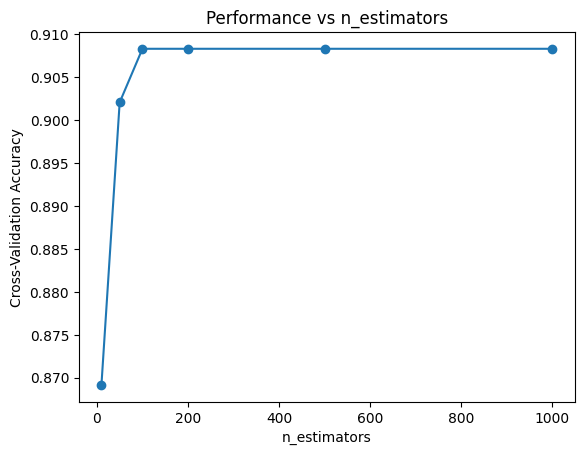

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10)

# Define the range of n_estimators to evaluate
n_estimators_range = [10, 50, 100, 200, 500, 1000]

# Store the cross-validation scores for each n_estimators value
cv_scores = []

# Loop over each value of n_estimators
for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=69)
    # Perform cross-validation and store the mean accuracy score
    scores = cross_val_score(clf, df_reduced.drop('Profit_Category',axis=1), df_reduced['Profit_Category'], cv=kf)  # 10-fold cross-validation
    cv_scores.append(np.mean(scores))  # Average score across folds

# Plot the results
plt.plot(n_estimators_range, cv_scores, marker='o')
plt.title("Performance vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Cross-Validation Accuracy")
plt.show()



In [32]:
# Find the maximum cross-validation score
max_score = np.max(cv_scores)

# Find the index of the maximum score
max_index = np.argmax(cv_scores)

# Get the corresponding n_estimators value for the maximum score
best_n_estimators = n_estimators_range[max_index]

print("max score: ", max_score,  "best n number:", best_n_estimators)

max score:  0.9083333333333334 best n number: 100


### 3.3.1 Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

trainAcc = []
testAcc = []
random_seed=69

randfor = ensemble.RandomForestClassifier(n_estimators=100,random_state=random_seed)
randfor.fit(x_train, y_train)
y_predTrain = randfor.predict(x_train)
y_predTest = randfor.predict(x_test)

trainAcc.append(accuracy_score(y_train, y_predTrain))
testAcc.append(accuracy_score(y_test, y_predTest))

kf = KFold(n_splits=10, shuffle=True, random_state=random_seed)


rt_score = cross_val_score(randfor, df_reduced.drop('Profit_Category',axis=1), df_reduced['Profit_Category'], cv=kf)

print("Random Forest:", np.mean(rt_score))

Random Forest: 0.8758333333333332


### 3.3.2 Bagging

In [34]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

random_seed=69
numBaseClassifiers = 100
maxdepth = 10
trainAcc = []
testAcc = []

trainAcc.append(accuracy_score(y_train, y_predTrain))
testAcc.append(accuracy_score(y_test, y_predTest))

kf = KFold(n_splits=10, shuffle=True, random_state=random_seed)
bag = ensemble.BaggingClassifier(
    DecisionTreeClassifier(max_depth=maxdepth, random_state=random_seed), 
    n_estimators=numBaseClassifiers,
    random_state=random_seed
)
bag.fit(x_train, y_train)
y_predTrain = bag.predict(x_train)
y_predTest = bag.predict(x_test)


bag_score = cross_val_score(bag, df_reduced.drop('Profit_Category',axis=1), df_reduced['Profit_Category'], cv=kf)

print("Bagging Trees:", np.mean(bag_score))

Bagging Trees: 0.9225


### 3.3.3 Ada Boost

In [35]:
from sklearn.ensemble import BaggingClassifier

random_seed = 69

ada = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth, random_state=random_seed),
    n_estimators=numBaseClassifiers,
    random_state=random_seed)
ada.fit(x_train, y_train)
y_predTrain = ada.predict(x_train)
y_predTest = ada.predict(x_test)

trainAcc.append(accuracy_score(y_train, y_predTrain))
testAcc.append(accuracy_score(y_test, y_predTest))

kf = KFold(n_splits=10, shuffle=True, random_state=random_seed)

ada_score = cross_val_score(ada, df_reduced.drop('Profit_Category',axis=1), df_reduced['Profit_Category'], cv=kf)
print("Ada:", np.mean(ada_score))


Ada: 0.8762500000000001


/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

In [36]:

# Mean of all the score arrays
print("Bagging:", np.mean(bag_score), "Random Forest:", np.mean(rt_score), "Ada:", np.mean(ada_score))

Bagging: 0.9225 Random Forest: 0.8758333333333332 Ada: 0.8762500000000001


### 2.4 Other means of evaluation

In [37]:
# After training the decision tree
y_train_pred = dtree.predict(x_train)

from sklearn.metrics import precision_score, recall_score, f1_score

# Since we have multiple classes, we can use 'micro' or 'macro' averaging depending on our evaluation needs.
# 'micro' counts the total true positives, false negatives, and false positives.
p = precision_score(y_train, y_train_pred, average='micro')
r = recall_score(y_train, y_train_pred, average='micro')
f1 = f1_score(y_train, y_train_pred, average='micro')

print("precision: ", p)
print("recall: ", r)
print("f1 score: ", f1)


precision:  1.0
recall:  1.0
f1 score:  1.0


In [38]:
# For Bagging
y_test_pred_bag = bag.predict(x_test)
p_bag = precision_score(y_test, y_test_pred_bag, average='micro')
r_bag = recall_score(y_test, y_test_pred_bag, average='micro')
f1_bag = f1_score(y_test, y_test_pred_bag, average='micro')

print("Bagging:")
print("precision:", p_bag)
print("recall:", r_bag)
print("f1 score:", f1_bag)

# For AdaBoost
y_test_pred_ada = ada.predict(x_test)
p_ada = precision_score(y_test, y_test_pred_ada, average='micro')
r_ada = recall_score(y_test, y_test_pred_ada, average='micro')
f1_ada = f1_score(y_test, y_test_pred_ada, average='micro')

print("AdaBoost:")
print("precision:", p_ada)
print("recall:", r_ada)
print("f1 score:", f1_ada)

# For Random Forest
y_test_pred_rf = randfor.predict(x_test)
p_rf = precision_score(y_test, y_test_pred_rf, average='micro')
r_rf = recall_score(y_test, y_test_pred_rf, average='micro')
f1_rf = f1_score(y_test, y_test_pred_rf, average='micro')

print("Random Forest:")
print("precision:", p_rf)
print("recall:", r_rf)
print("f1 score:", f1_rf)

Bagging:
precision: 0.9361702127659575
recall: 0.9361702127659575
f1 score: 0.9361702127659575
AdaBoost:
precision: 0.851063829787234
recall: 0.851063829787234
f1 score: 0.851063829787234
Random Forest:
precision: 0.9148936170212766
recall: 0.9148936170212766
f1 score: 0.9148936170212766


## 3.4 Summary